# Building a system in python for predicting Fake News using Machine Learning with Python.

### We will be using Logistic Regression model for prediction and also using NLTK or Natural Language ToolKit and comparission with Random Forest Classifier.

#### Work Flow
     
     1. Collecting News Data
     2. Data pre processing
     3. Splitting into Train and Test 
     4. Feeding into ML model - Logistic Regression Model here
     5. Receive a trained Logistic Regression model
     
          -- When we give any new data the model will predict whether the News is Fake or Real.

### Logistic Regression Model

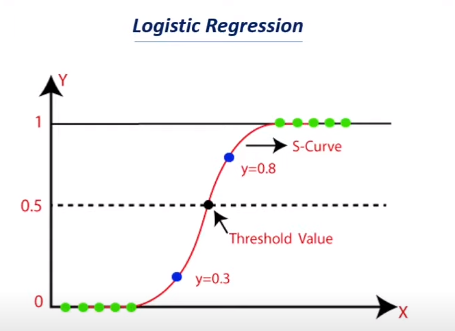
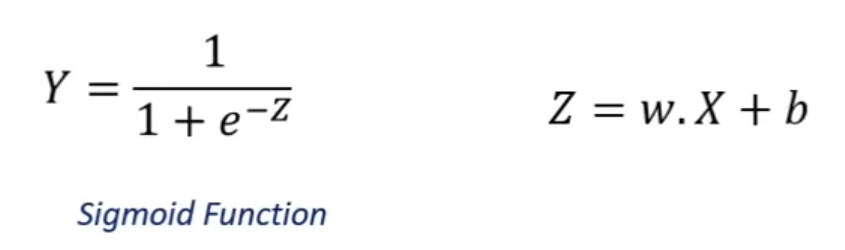
X - input features, Y - prediction probability, w - weights, b - bias

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import re # Regular Expression for searching text in the document
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # Removes prefix and suffix and gives the root word
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text into feature vectors or numbers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Example of stopwords( Words that do not add much value to the paragraph.)
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# Data Collection and Data Processing

# Loading Dataset
news_data = pd.read_csv('train.csv')
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
news_data.shape

(20800, 5)

In [7]:
# Finding and all the null values 
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
# replacing all the null values with empty dataset
news_data = news_data.fillna('')

In [9]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
# Merging the author name and news title
news_data['content'] = news_data['author'] + news_data['title']
news_data['content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [11]:
# Seperating Data and Labels
X = news_data.drop(columns=['label'], axis=1)
Y = news_data['label']

print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

#### Stemming : Process of reducing a word to its root word.
Example: Actor, Actress, Acting --> Act

In [12]:
port_stem = PorterStemmer()

In [13]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content) # removing (^ - means excluding a-z, A-Z) everything except
    stemmed_content = stemmed_content.lower() # converting all letters to small case or lower case 
    stemmed_content = stemmed_content.split() # split to convert letter into list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')] # running a for loop to choose words others than stopwords
    stemmed_content = ' '.join(stemmed_content) # joining all those words
    return stemmed_content

In [14]:
news_data['content'] = news_data['content'].apply(stemming)
print(news_data['content'])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


In [15]:
# Seperating Data and Labels
X = news_data['content'].values
Y = news_data['label'].values

print(X)
print()
print(Y)
# To be fed into our ML model

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']

[1 0 1 ... 0 1 1]


In [16]:
# Converting the textual data to numerical data
vectorizer = TfidfVectorizer() # Tf - Term Frequency; idf - Inverse Document Frequency ; counts the number of times a particular word is repeating in text/paragraph ; 
# purpose of TF - This repetition tells the model that this word is an important word and it assigns a particular numerical value to that word
# purpose of idf - some words might not have a very big role but will appear many times so idf reduces the importance value
vectorizer.fit(X)

X = vectorizer.transform(X) # converts all X values to its respective features
print(X)

  (0, 26340)	0.28088379401596425
  (0, 22724)	0.2552336018069161
  (0, 15019)	0.43006226759639316
  (0, 14555)	0.29177259684200296
  (0, 12782)	0.24619727512767195
  (0, 8022)	0.23133661742488731
  (0, 6273)	0.2839932825877813
  (0, 5969)	0.35488202138141456
  (0, 5006)	0.2472595823572816
  (0, 4211)	0.3625320323150658
  (0, 578)	0.2694167078545385
  (1, 27923)	0.36911845953845024
  (1, 11313)	0.24166773097712638
  (1, 8772)	0.5258635625386451
  (1, 5916)	0.31810058109638056
  (1, 4767)	0.23338756776626793
  (1, 3859)	0.45980466668763476
  (1, 3281)	0.18652439327549428
  (1, 2622)	0.3562953366945267
  (2, 26235)	0.3665032495181434
  (2, 16361)	0.43295215406038445
  (2, 9454)	0.30743020569262086
  (2, 8567)	0.3411947414020896
  (2, 5240)	0.40440534260277944
  (2, 5121)	0.5511414848555652
  :	:
  (20797, 25776)	0.08220218573989037
  (20797, 25319)	0.3119640221826561
  (20797, 22086)	0.24902354987792552
  (20797, 20778)	0.2729578683228216
  (20797, 20493)	0.249994989010826
  (20797, 17505

In [17]:
# Splitting into Training and Testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1 ) 
# test_size means splitting ratio 0.2 means 80-20 distribution
# stratify = Y means splitting the data in equal number means equal number of mine and rock in training and testing data
# random_state = 1 means splitting the data in a particylar way if state = 2 it is splitted inna different manner

print(X.shape, X_train.shape, X_test.shape)

(20800, 28419) (18720, 28419) (2080, 28419)


In [18]:
# Creating the Logistic Regression model
model = LogisticRegression()

In [19]:
# Training the model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
# Evaluating the model 

# Finding accuracy of training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.9729166666666667

In [25]:
# Finding accuracy of testing data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
testing_data_accuracy

0.9615384615384616

#### Making the Prediction System

In [21]:
# TAKING INPUT FROM USER
# Sample input: 'The researchers found that eating a diet rich in fruits, vegetables, and whole grains can significantly reduce the risk of chronic diseases such as heart disease, diabetes, and cancer. This study is one of the largest and most comprehensive analyses of its kind, involving over 100,000 participants from various regions around the world. The findings highlight the importance of adopting a healthy diet to promote overall well-being.
'

user_input = input("Enter a news article: ")#enter you input here

# Preprocess the user input
preprocessed_input = stemming(user_input)

# Convert preprocessed input into numerical features
input_vector = vectorizer.transform([preprocessed_input]) 

prediction = model.predict(input_vector)
print(prediction)

if (prediction[0]==0):
    print("News is Real")
else:
    print("News is False")

Enter a news article: The researchers found that eating a diet rich in fruits, vegetables, and whole grains can significantly reduce the risk of chronic diseases such as heart disease, diabetes, and cancer. This study is one of the largest and most comprehensive analyses of its kind, involving over 100,000 participants from various regions around the world. The findings highlight the importance of adopting a healthy diet to promote overall well-being.
[1]
News is False


In [22]:
print(X_test[0])

  (0, 28256)	0.08122894812554655
  (0, 27455)	0.3126194562349798
  (0, 26618)	0.37884655784990917
  (0, 25776)	0.08020159413526455
  (0, 22069)	0.30437161331777773
  (0, 21795)	0.3532264176751665
  (0, 17505)	0.15787110085248174
  (0, 13699)	0.28000454396324753
  (0, 10495)	0.37884655784990917
  (0, 8179)	0.21463706363133608
  (0, 6955)	0.2937382944084791
  (0, 6846)	0.26720546467286294
  (0, 5930)	0.27875147314303506


In [23]:
# TAKING INPUT FROM TESTING DATA
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print("News is Real")
else:
    print("News is False")

[0]
News is Real


## Feature Importance

#### This can help you understand which words or terms contributed the most to the model's predictions.

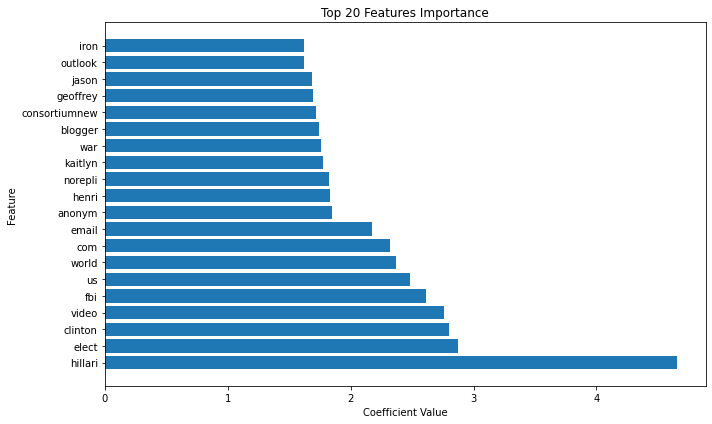

In [25]:
import matplotlib.pyplot as plt

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients (weights) from the model
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and their corresponding coefficients
feature_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their coefficients
feature_coef_df = feature_coef_df.sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
top_n = 20  # Number of top features to plot
plt.figure(figsize=(10, 6))
plt.barh(feature_coef_df['Feature'][:top_n], feature_coef_df['Coefficient'][:top_n])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top {} Features Importance'.format(top_n))
plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, Y_train)

# Evaluate the model on test data
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(rf_predictions, Y_test)

print("Accuracy of Logistic Regression: {:.2f}%".format(training_data_accuracy * 100))
print("Accuracy of Random Forest Classifier: {:.2f}%".format(rf_accuracy * 100))

Accuracy of Logistic Regression: 97.29%
Accuracy of Random Forest Classifier: 97.84%


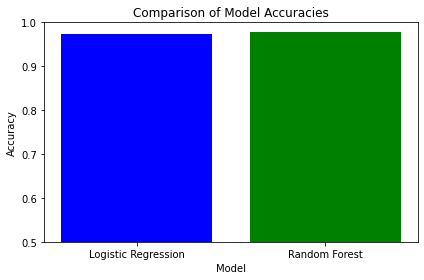

In [27]:
import matplotlib.pyplot as plt
# Create a bar chart to compare model accuracies
models = ['Logistic Regression', 'Random Forest']
accuracies = [training_data_accuracy, rf_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits for better visualization
plt.tight_layout()
plt.show()